In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(Path('../Drilling_ML/Cleaned Drilling Parameters.csv'))
df.head()

,Well Name,Bit RPM (RPM),Bit Torque (kft_lb),Depth of Cut (in),Gamma (api),Mechanical Specific Energy (ksi),On Bottom ROP (ft_per_hr),Rotary RPM (RPM),Total Pump Output (gal_per_min),Weight on Bit (klbs)
0,Well 1,177,3,0.061,1.211953e+02,6.280000e+01,53.39,8.06,604.15,56.0
1,Well 1,221,3,0.015,1.216004e+10,1.747549e+10,14.66,29.54,769.07,34.3
2,Well 1,221,1,0.013,1.098020e+02,9.770000e+01,10.12,29.62,771.56,14.1
3,Well 1,225,1,0.013,9.126216e+02,1.243000e+02,10.12,29.48,784.98,13.6
4,Well 1,205,0,0.064,1.658614e+11,9.400000e+00,65.33,28.75,708.25,6.2


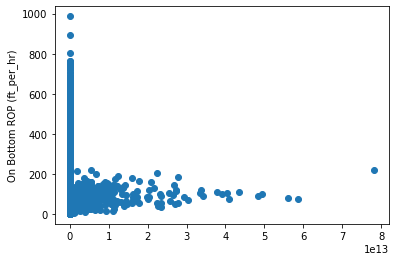

In [22]:
x = df["Weight on Bit (klbs)"] * df["Gamma (api)"]
y = df["On Bottom ROP (ft_per_hr)"]
plt.scatter(x, y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.show()

In [23]:
df = df[(x < 100)& (y < 1000)]

In [24]:
y = df["On Bottom ROP (ft_per_hr)"]

In [25]:
model = LinearRegression()

In [26]:
x = df["Weight on Bit (klbs)"].values.reshape(-1, 1)

In [27]:
x[:5]

array([[14.3],
       [23.8],
       [29.4],
       [ 9.2],
       [20. ]])

In [28]:
x.shape

(258, 1)

In [29]:
model.fit(x, y)

LinearRegression()

In [30]:
y_pred = model.predict(x)
print(y_pred.shape)

(258,)


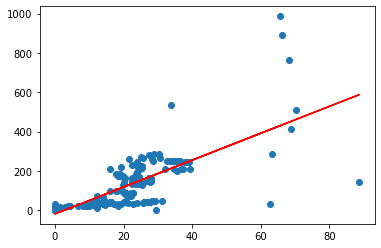

In [31]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()